### 06. 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('C:/Users/Jaewon/ESAA/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

    
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        from sklearn.preprocessing import Binarizer
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict,pred_proba_c1)

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # treshold ndarray와 threshold에 따른 정밀도, 제현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scaledmf 0.1단위로 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # X축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Presicion and Recall value')
    plt.legend()
    plt.grid()

In [4]:
import warnings 
warnings.filterwarnings("ignore")

# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블값임. 칼럼 위치 -1를 이용해 추출

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율:0.5741, F1 : 0.6392, AUC : 0.7919


- 전체 데이터의 65%가 Negative이므로 정확도보다 재현율 성능에 초점
- 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화 확인

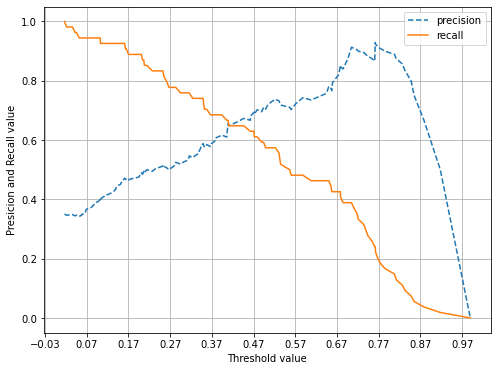

In [5]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느정도 균형을 맞춤. 하지만 두개의 지표 모두 0.7이 안되는 수치로 낮은 값
- 임곗값을 인위적으로 조작하기 전 다시 데이터 값 점검 - 피처 값의 분포도 확인


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min()값이 0으로 돼있는 피처가 상당히 많음
- Glucose 피처는 포도당 수치인데 min=0인 것이 말이 되지 않음
- min()=0인 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇퍼센트의 비율로 존재하는지 확인

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

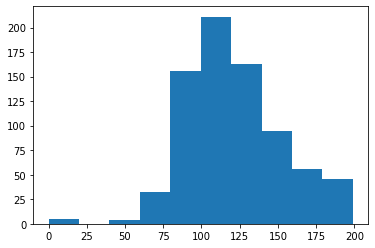

In [7]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [8]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [9]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

In [10]:
# 0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 

- 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선
- 재현율 수치는 여전히 개선 필요

In [11]:
# 분류 결정 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차행렬
[[67 33]
 [12 42]]
정확도 : 0.7078, 정밀도 : 0.5600, 재현율:0.7778, F1 : 0.6512, AUC : 0.8296
임곗값: 0.33
오차행렬
[[71 29]
 [13 41]]
정확도 : 0.7273, 정밀도 : 0.5857, 재현율:0.7593, F1 : 0.6613, AUC : 0.8296
임곗값: 0.36
오차행렬
[[79 21]
 [17 37]]
정확도 : 0.7532, 정밀도 : 0.6379, 재현율:0.6852, F1 : 0.6607, AUC : 0.8296
임곗값: 0.39
오차행렬
[[81 19]
 [18 36]]
정확도 : 0.7597, 정밀도 : 0.6545, 재현율:0.6667, F1 : 0.6606, AUC : 0.8296
임곗값: 0.42
오차행렬
[[84 16]
 [20 34]]
정확도 : 0.7662, 정밀도 : 0.6800, 재현율:0.6296, F1 : 0.6538, AUC : 0.8296
임곗값: 0.45
오차행렬
[[87 13]
 [20 34]]
정확도 : 0.7857, 정밀도 : 0.7234, 재현율:0.6296, F1 : 0.6733, AUC : 0.8296
임곗값: 0.48
오차행렬
[[89 11]
 [24 30]]
정확도 : 0.7727, 정밀도 : 0.7317, 재현율:0.5556, F1 : 0.6316, AUC : 0.8296
임곗값: 0.5
오차행렬
[[89 11]
 [26 28]]
정확도 : 0.7597, 정밀도 : 0.7179, 재현율:0.5185, F1 : 0.6022, AUC : 0.8296


- 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값은 0.33으로, 재현율 값이 0.7963이지만 정밀도가 매우 저조해져 극단적인 선택임
- 임곗값 0.48이 전체적인 성능 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값 (정확도 0.7987, 정밀도 0.7447, 재현율 0.6481, F1스코어 0.6931, ROC AUC 0.8433)

In [12]:
# 로지스틱 회귀모델을 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측
# 임곗값을 0.48로 설정한 BInarizer 생성
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_proba = lr_clf.predict_proba(X_test)
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[89 11]
 [24 30]]
정확도 : 0.7727, 정밀도 : 0.7317, 재현율:0.5556, F1 : 0.6316, AUC : 0.8296
